# Async - Linear Regression

In this lesson you will create (and plot) a simple regression line for a dataset. You don't need to use any fancy math or fancy tools, you are just adjusting m and b until you have a trendline you are happy with. 

After this, you will calculate the various loss values (L1, L2, MAE, MSE). 

### Importing dependancies and data 

Let's start by importing what we need. 

In [7]:
# Import dependancies 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
dataset = pd.read_csv('../datasets/taxstats2015individual28countaveragemedianbypostcode.csv')
dataset.head()

,Postcode,Count taxable income or loss,Average taxable income or loss,Median taxable income or loss,Count salary and wages,Average salary and wages,Median salary and wages,Count net rent,Average net rent,Median net rent,...,Median total business income,Count total business expenses,Average total business expenses,Median total business expenses,Count net tax,Average net tax,Median net tax,Count super total accounts balance,Average super total accounts balance,Median super total accounts balance
0,2000,36185,47723,18213,31293,38710,17992,3614,558,207,...,19684,1331,222191,20773,17264,27555,5917,51394,68531,1110
1,2006,83,80905,58150,74,82733,67658,21,1042,-807,...,42054,4,48971,18508,67,28142,19359,137,90315,15544
2,2007,4769,46549,31474,4153,47386,34366,548,-1242,-794,...,19960,334,639499,9233,3071,15649,9115,6711,41670,5225
3,2008,5607,108816,41151,5008,53418,42892,612,1818,-1728,...,19722,481,32173,9385,4061,53976,10583,7676,54245,10373
4,2009,9726,82938,50604,8167,74068,55243,1714,-2412,-1520,...,26044,666,222993,11982,7358,32430,14835,12718,126486,20494


### Postcode Linear Regression

Here is my very poor model, predicting tax based on postcode. Note that its not very effective, as you can see in the plot. 

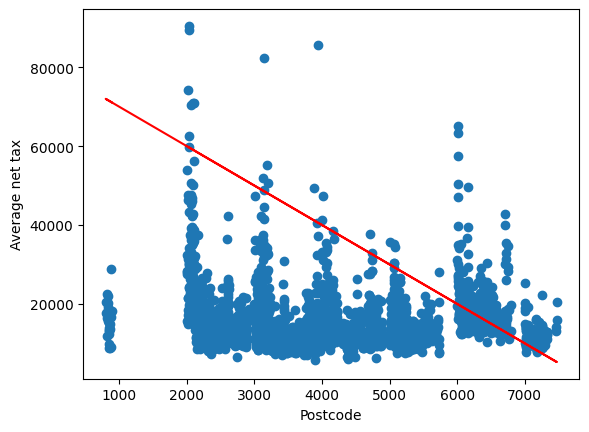

In [8]:
def y_postcode(x):
    ''' This simple function takes a postcode and returns the average net tax. 
    It does a poor job!'''
    return -10*x + 80000

plt.scatter(dataset['Postcode'], dataset['Average net tax'])
plt.xlabel('Postcode')
plt.ylabel('Average net tax')

predicted_y_postcode = y_postcode(dataset['Postcode']) #Here we use the function to predict y values based on x values
plt.plot(dataset['Postcode'], predicted_y_postcode, color='red')

plt.show()

### Improved Linear Regression

Now it's your turn. You can copy down the code from above if you wish. You should choose another column from the dataset, plot it against 'Average Net Tax', then create a function (with an m and b), and plot it over the top as a line (just like the example above). 

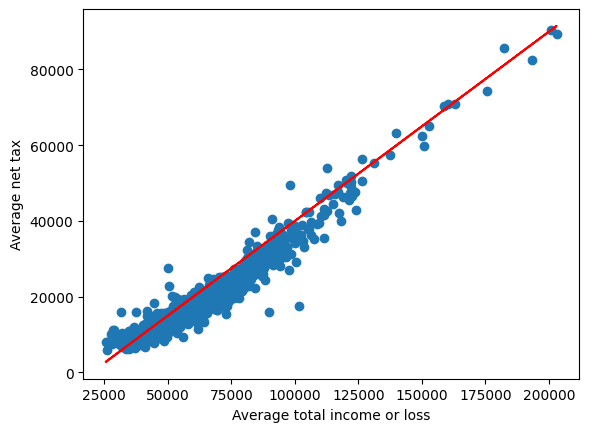

In [9]:
# Select a different column in the dataset, and create a scatter plot for it 
# Try predicting a better trendline (have a few quesses until you have an m and b you are happy with)
# Plot the two together, as I have done above

# Example Solution
def y_new(x):
    ''' This simple function takes a postcode and returns the average net tax. 
    It does a poor job!'''
    return .5*x - 10000

plt.scatter(dataset['Average total income or loss'], dataset['Average net tax'])
plt.xlabel('Average total income or loss')
plt.ylabel('Average net tax')

predicted_y_income = y_new(dataset['Average total income or loss']) #Here we use the function to predict y values based on x values
plt.plot(dataset['Average total income or loss'], predicted_y_income, color='red')

plt.show()


### Loss
Now it's time to evaluate the models! 

Calculate the L1, L2, MAE and MSE for the existing postcode model and for your new and improved model. 

In [16]:
# Calculate L1, L2, MAE and MSE for the existing postcode model and for your new and improved model

def losses(model_predictions, actual_values):
    l1_losses = abs(model_predictions - actual_values)
    l2_losses = np.square(l1_losses)
    print(f'L1 loss: {l1_losses.sum():.2f}')
    print(f'MAE loss: {l1_losses.mean():.2f}')
    print(f'L2 loss: {l2_losses.sum():.2f}')
    print(f'MSE loss: {l2_losses.mean():.2f}')

print('Loss of postcode model:')
losses(predicted_y_postcode, dataset['Average net tax'])
print()
print('Loss of income model:')
losses(predicted_y_income, dataset['Average net tax'])

Loss of postcode model:
L1 loss: 61106618.00
MAE loss: 24709.51
L2 loss: 1999895075746.00
MSE loss: 808691902.85

Loss of income model:
L1 loss: 6394209.50
MAE loss: 2585.61
L2 loss: 24085481978.75
MSE loss: 9739378.07
